In [ ]:
#car_performance_EDA assignment

This dataset was taken from the StatLib library which is maintained at 
Carnegie Mellon University. The dataset was used in the 1983 
American Statistical Association Exposition.

Attribute Information:

mpg: continuous
cylinders: multi-valued discrete
displacement: continuous
horsepower: continuous
weight: continuous
acceleration: continuous
model year: multi-valued discrete
origin: multi-valued discrete
car name: string (unique for each instance)
Relevant Papers:



In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading the dataset

In [2]:
df = pd.read_csv("car_performance.csv")
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


# COUNT PLOT

Text(0.5, 1.0, 'Distribution of origin')

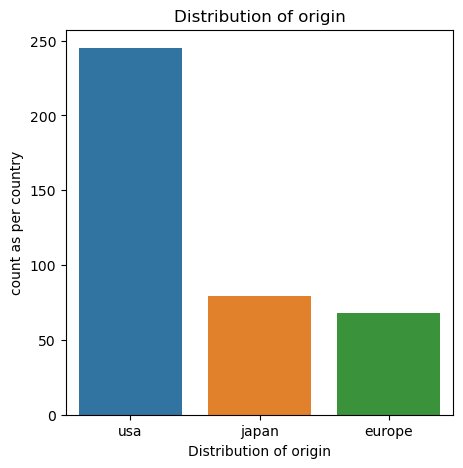

In [10]:
plt.figure(figsize=(5, 5))

sns.countplot(x="origin", data=df)
plt.xlabel("Distribution of origin")
plt.ylabel("count as per country")
plt.title("Distribution of origin")
#plt.tight_layout()

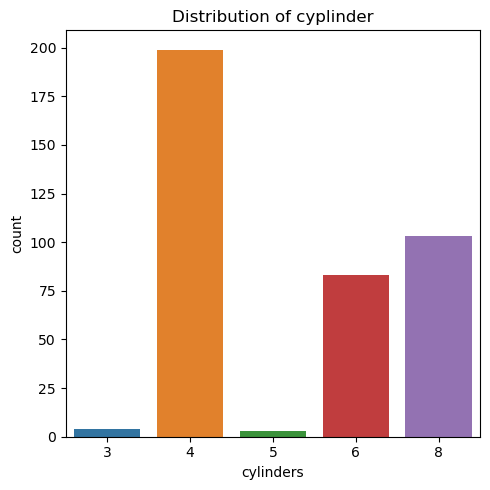

In [4]:
plt.figure(figsize=(5, 5))

sns.countplot(x="cylinders", data=df)
plt.title("Distribution of cyplinder")
plt.tight_layout()

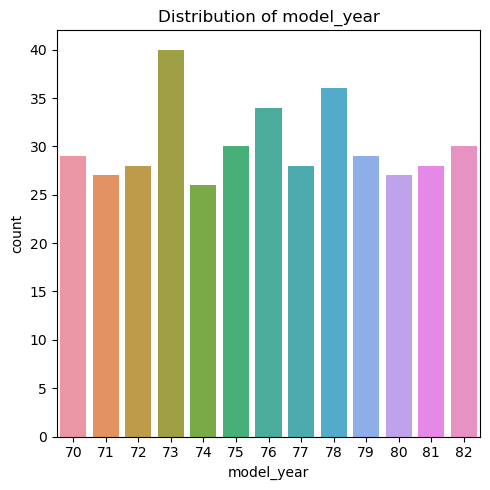

In [5]:
plt.figure(figsize=(5, 5))

sns.countplot(x="model_year", data=df)
plt.title("Distribution of model_year")
plt.tight_layout()

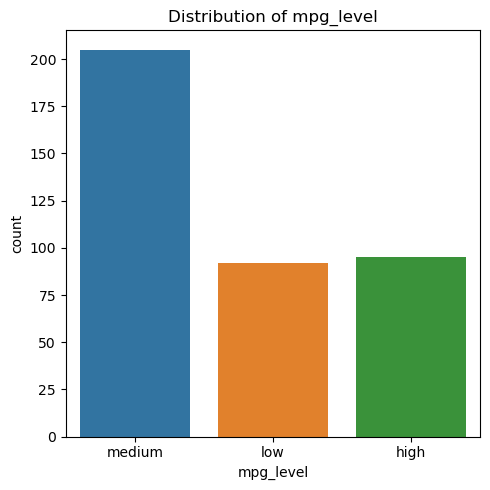

In [6]:
plt.figure(figsize=(5, 5))

sns.countplot(x="mpg_level", data=df)
plt.title("Distribution of mpg_level")
plt.tight_layout()

# SUBPLOTS

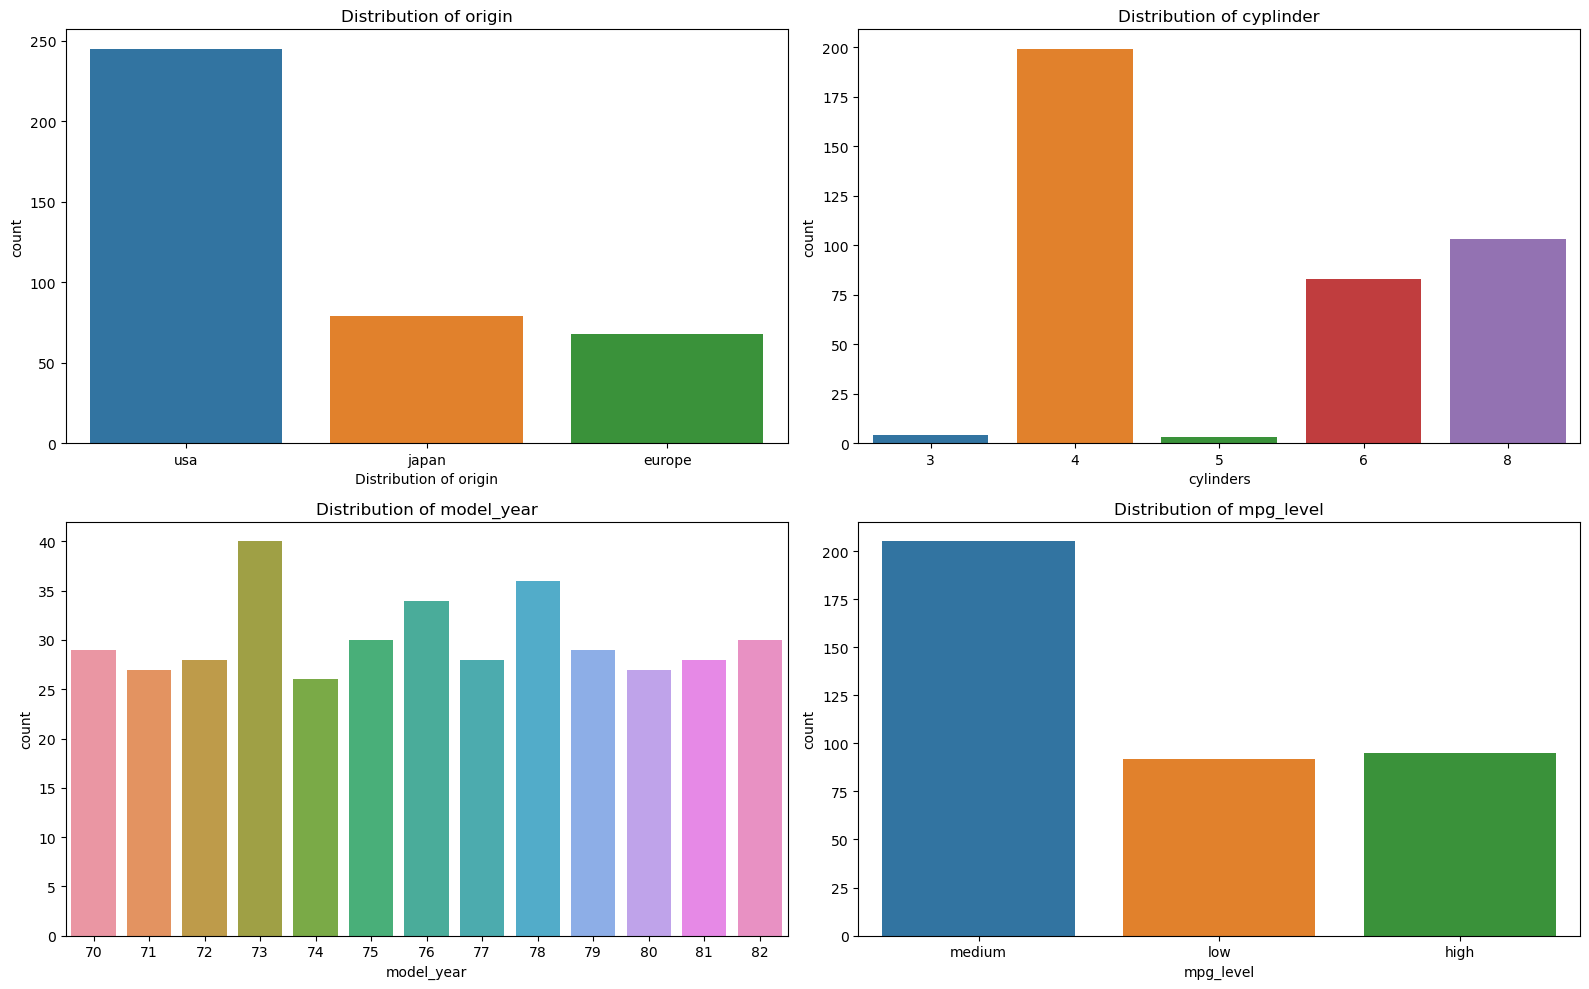

In [7]:
plt.subplots(2,2,figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x="origin", data=df)
plt.xlabel("Distribution of origin")
plt.title("Distribution of origin")

plt.subplot(2,2,2)
sns.countplot(x="cylinders", data=df)
plt.title("Distribution of cyplinder")

plt.subplot(2,2,3)
sns.countplot(x="model_year", data=df)
plt.title("Distribution of model_year")

plt.subplot(2,2,4)
sns.countplot(x="mpg_level", data=df)
plt.title("Distribution of mpg_level")


plt.tight_layout()

In [11]:
df["origin"].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

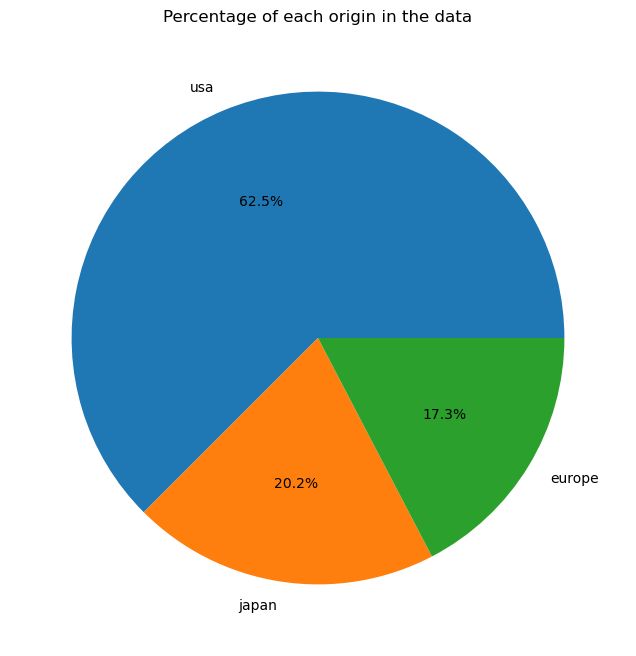

In [13]:
plt.figure(figsize=(8,8))
plt.pie(x=df["origin"].value_counts(),labels=df["origin"].value_counts().index,autopct='%0.1f%%',data=df)
plt.title('Percentage of each origin in the data')
plt.show()

# PIE PLOT

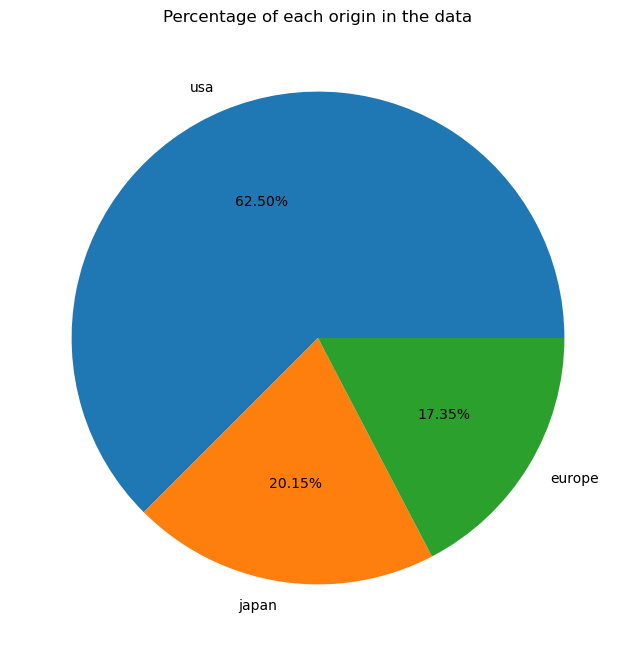

In [8]:
plt.figure(figsize=(8,8))
plt.pie(x=df["origin"].value_counts(),labels=df["origin"].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of each origin in the data')
plt.show()

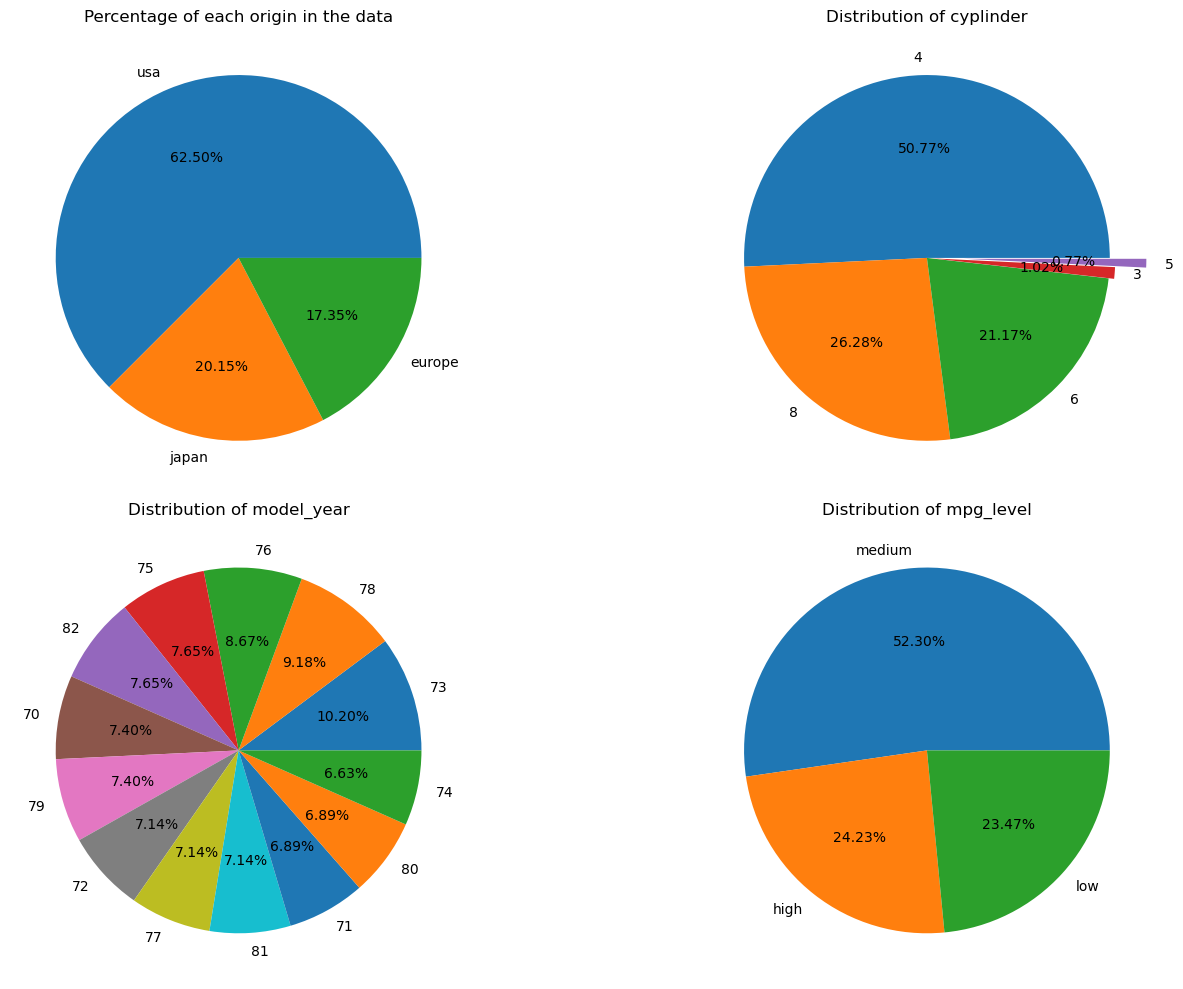

In [9]:
plt.subplots(2,2,figsize=(16,10))

plt.subplot(2,2,1)
plt.pie(x=df["origin"].value_counts(),labels=df["origin"].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of each origin in the data')

plt.subplot(2,2,2)
plt.title("Distribution of cyplinder")
plt.pie(x=df["cylinders"].value_counts(),labels=df["cylinders"].value_counts().index,autopct='%0.2f%%',explode=[0,0,0,0.03,0.2],data=df)


plt.subplot(2,2,3)

plt.title("Distribution of model_year")
plt.pie(x=df["model_year"].value_counts(),labels=df["model_year"].value_counts().index,autopct='%0.2f%%',data=df)

plt.subplot(2,2,4)
plt.title("Distribution of mpg_level")
plt.pie(x=df["mpg_level"].value_counts(),labels=df["mpg_level"].value_counts().index,autopct='%0.2f%%',data=df)

plt.tight_layout()

`usa` alone contributes to 62.5% of origin
`4` alone contributes to 50.77% of cylinders
`73` alone contributes to 10.2% of model_year
`medium` alone contributes to 52.3% of mpg_level

Insights
origin is highly imbalanced, usa alone consists of 62.5% of data 
whereas japan & europe are having similar proportion.

We will see this dominance in future analysis. 
We will try to find the reason for this in our further analysis.
cylinders is highly imbalanced, 4 alone consists of 50.77% of data. 
Whereas 8 & 6 are nearly in same proportion but 3 & 5 collectively accounts 
for only 7 entries i.e., 1.8% of entire data. We will see this 
huge proportional imbalance in cylinders in future analysis.
mpg_level is highly imbalanced, medium alone consists of 52.3% of 
data while low & high are in the same proportion. This dominance is 
due the fact of our thresholding while manufacturing this feature 
because the medium range is broader hence it consists of more data points. 
It won't be there in original mpg feature as it is continous.
model_year is considerably balanced which is good.

In [ ]:
Conclusion
Every categorical attribute except model_year is highly imbalanced 
and far from uniform distribution. In all cases most of the data is 
comprised of top few categories.
Although model_year is not perfectly uniform but we can think it as 
uniform-like distribution. This is a digestible assumption for two reasons, 
first we can clearly see in plot that indeed the distribution is uniform-like 
and also this is not the entire population but a sample of it 
so may be in large run it will converge to uniform which may be the 
true population distribution (Law of Large Number).

In [ ]:
# Now we will analyze how different features behaves on changing other features

In [14]:
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


Text(0.5, 1.0, 'Distribution of cylinder by origin')

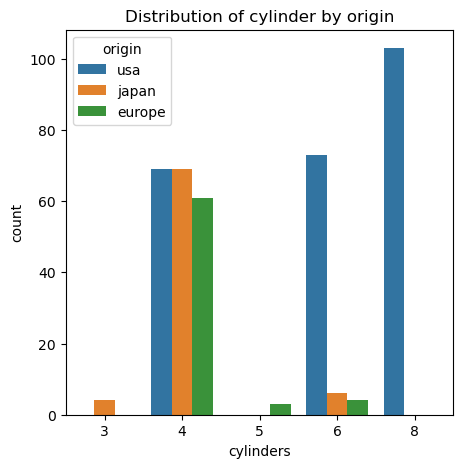

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(x="cylinders",data=df,hue="origin")
plt.title("Distribution of cylinder by origin")

#cylinder bifurgation by origin-
the 3 cylinder car -- only with japan
the 8 cylinder car -- only with usa
the 5 cyliner cat-- only with europe
the 6 cylinder highesh no. with usa
the 4- cylinder car is most common -- all countries has these type

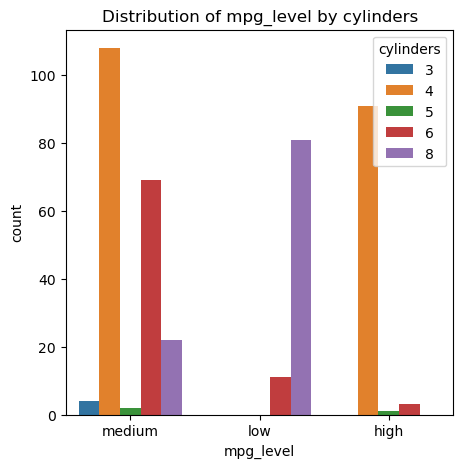

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x="mpg_level",data=df,hue="cylinders")
plt.title("Distribution of mpg_level by cylinders")
plt.show()

In [ ]:
# lets analyze catplot 

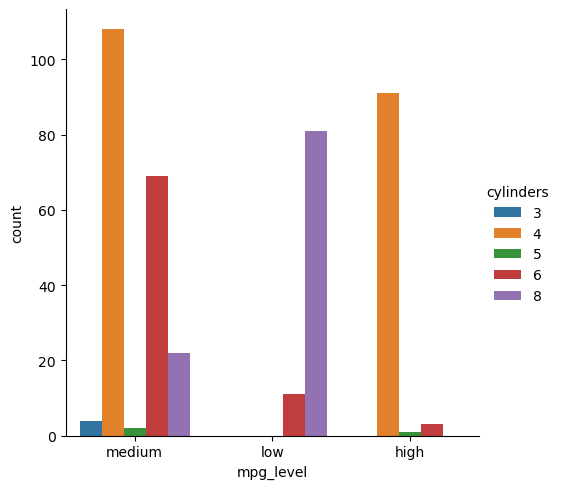

In [20]:
sns.catplot(x="mpg_level",hue="cylinders",data=df,kind="count")

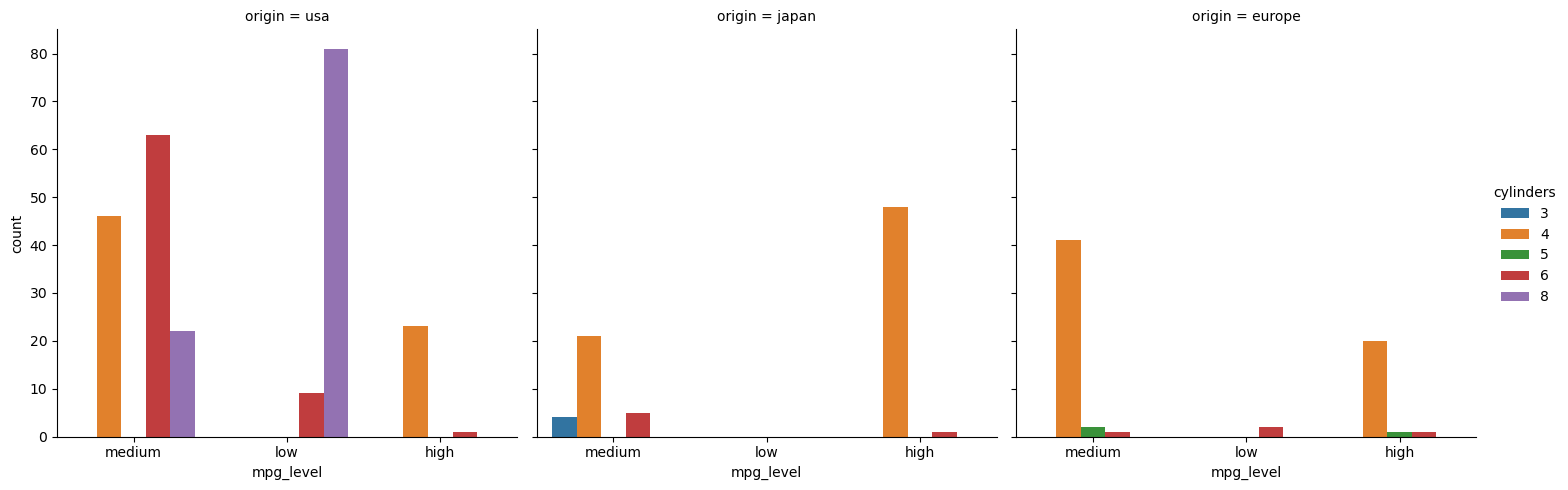

In [21]:
sns.catplot(x="mpg_level",hue="cylinders",data=df,kind="count",col="origin")

In [ ]:
# japan is leading if high mileage is an imp factor

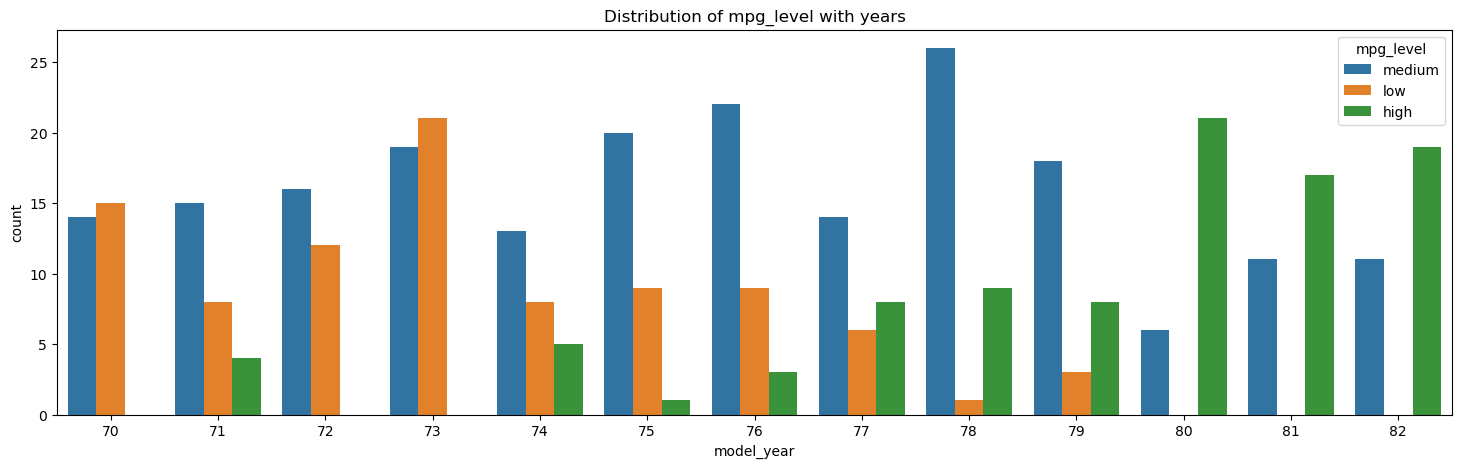

In [26]:
plt.figure(figsize=(18,5))
sns.countplot(x="model_year",data=df,hue="mpg_level")
#sns.relplot(x="model_year",data=df)
plt.title("Distribution of mpg_level with years")
plt.show()

In [22]:
df.head()

,origin,cylinders,model_year,mpg_level,car_company,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,18.0,307.0,130.0,3504,12.0
1,usa,8,70,low,buick,15.0,350.0,165.0,3693,11.5
2,usa,8,70,medium,plymouth,18.0,318.0,150.0,3436,11.0
3,usa,8,70,low,amc,16.0,304.0,150.0,3433,12.0
4,usa,8,70,medium,ford,17.0,302.0,140.0,3449,10.5


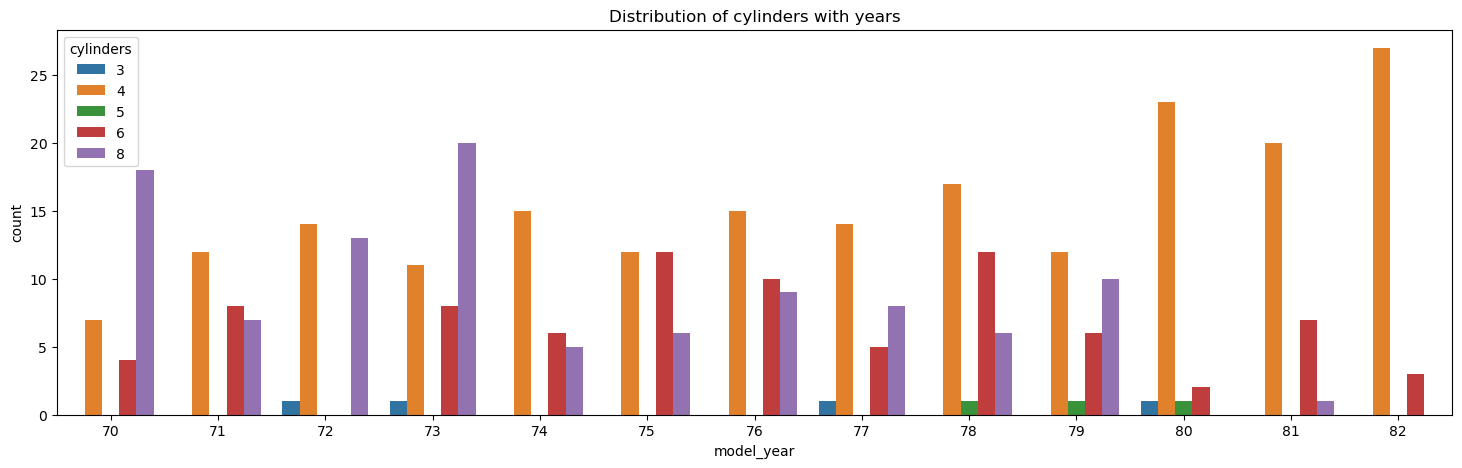

In [27]:
plt.figure(figsize=(18,5))
sns.countplot(x="model_year",data=df,hue="cylinders")
#sns.relplot(x="model_year",data=df)
plt.title("Distribution of cylinders with years")
plt.show()

In [ ]:
# with year progresses the car with more cylinders (8 & 6) decreases significantly.
# with 4 cylinder having significant proportion .. after year 80's.

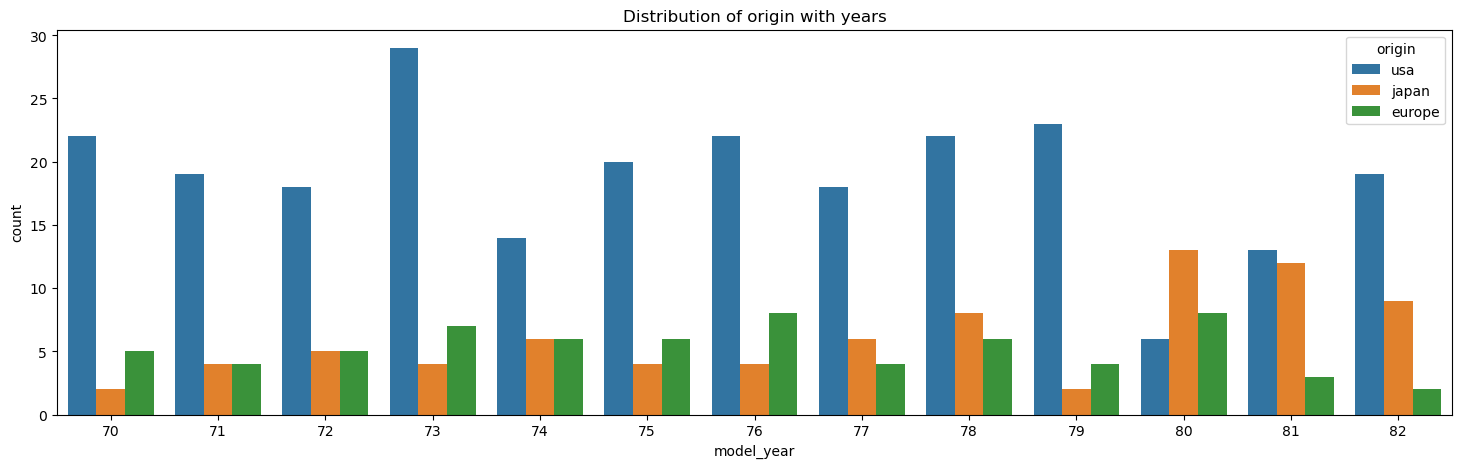

In [28]:
plt.figure(figsize=(18,5))
sns.countplot(x="model_year",data=df,hue="origin")

plt.title("Distribution of origin with years")
plt.show()

In [ ]:
# starting year USA is dominating--- as time progresses japan and europe 
#started manufacturing more cars.
# in year 80,81 japan having a good contribution w,r,to other countries.

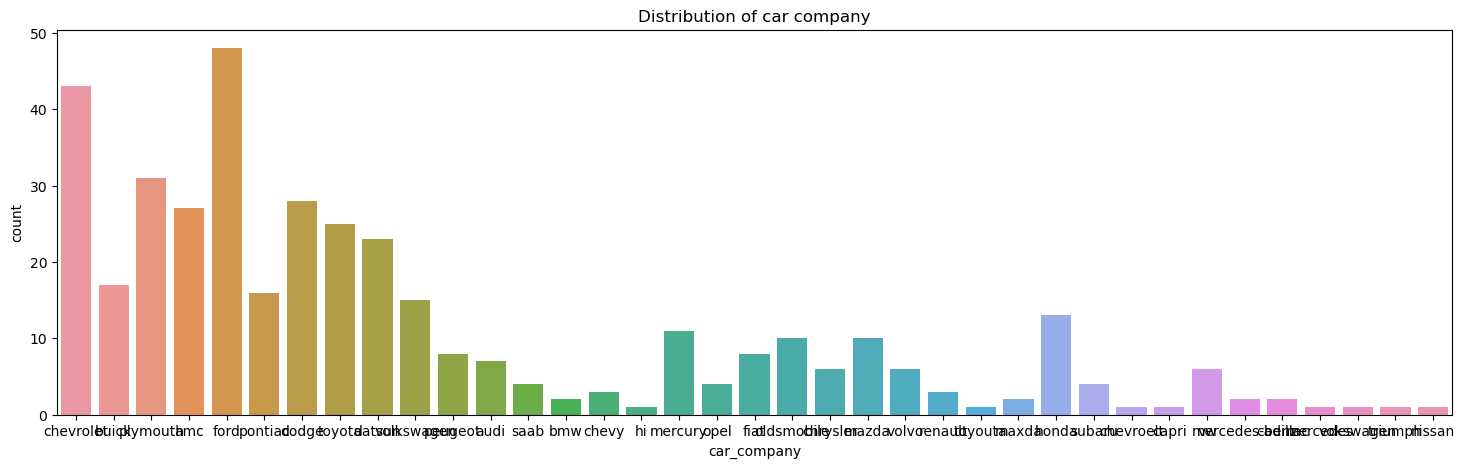

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(x="car_company",data=df)

plt.title("Distribution of car company")
plt.show()

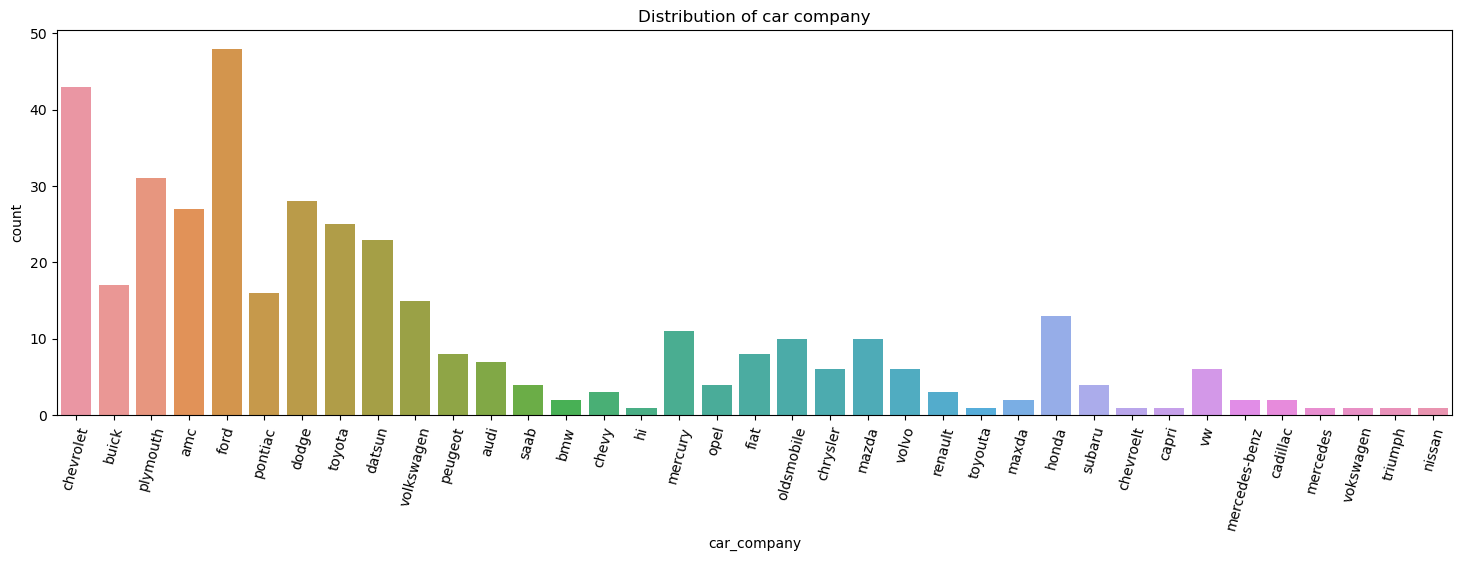

In [30]:
plt.figure(figsize=(18,5))
sns.countplot(x="car_company",data=df)
plt.xticks(rotation=75)
plt.title("Distribution of car company")
plt.show()

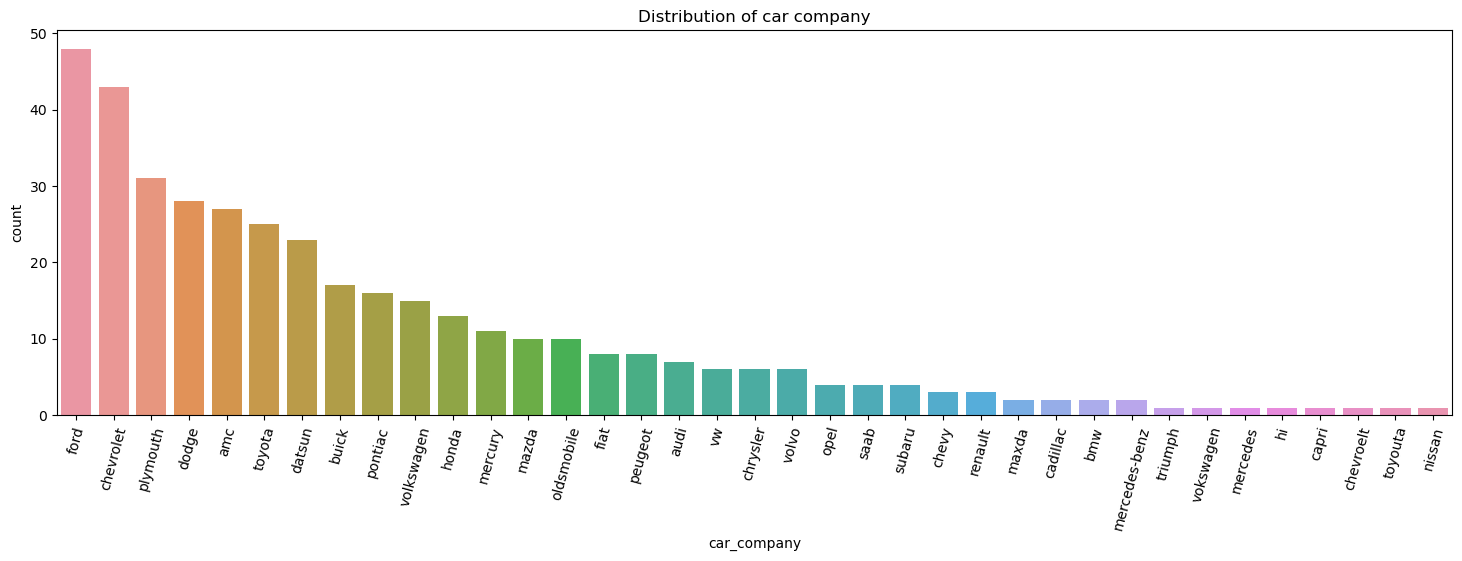

In [31]:
plt.figure(figsize=(18,5))
sns.countplot(x="car_company",data=df,order=df["car_company"].value_counts().index)
plt.xticks(rotation=75)
plt.title("Distribution of car company")
plt.show()

In [33]:
df["car_company"].value_counts(normalize=True)

ford             0.122449
chevrolet        0.109694
plymouth         0.079082
dodge            0.071429
amc              0.068878
toyota           0.063776
datsun           0.058673
buick            0.043367
pontiac          0.040816
volkswagen       0.038265
honda            0.033163
mercury          0.028061
mazda            0.025510
oldsmobile       0.025510
fiat             0.020408
peugeot          0.020408
audi             0.017857
vw               0.015306
chrysler         0.015306
volvo            0.015306
opel             0.010204
saab             0.010204
subaru           0.010204
chevy            0.007653
renault          0.007653
maxda            0.005102
cadillac         0.005102
bmw              0.005102
mercedes-benz    0.005102
triumph          0.002551
vokswagen        0.002551
mercedes         0.002551
hi               0.002551
capri            0.002551
chevroelt        0.002551
toyouta          0.002551
nissan           0.002551
Name: car_company, dtype: float64

# Barplot

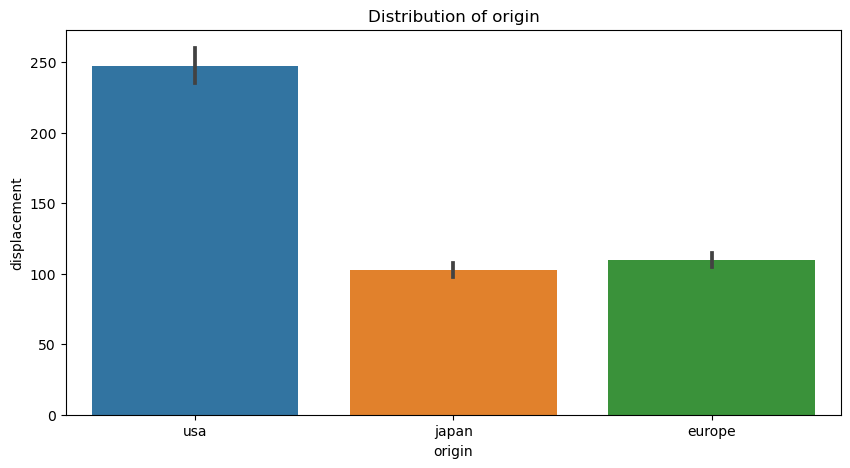

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x="origin",y="displacement",data=df)
#plt.xticks(rotation=75)
plt.title("Distribution of origin")
plt.show()

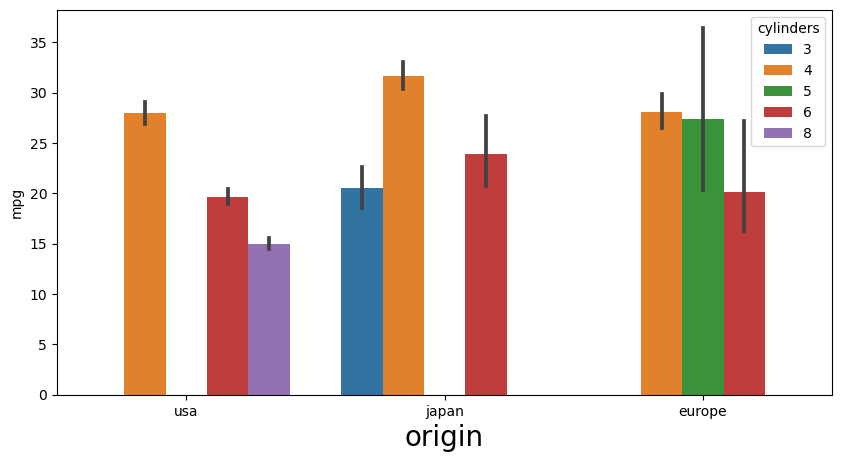

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x="origin",y="mpg",data=df,hue="cylinders")

#plt.title("Distribution of origin")
plt.xlabel("origin",fontsize=20)
plt.show()

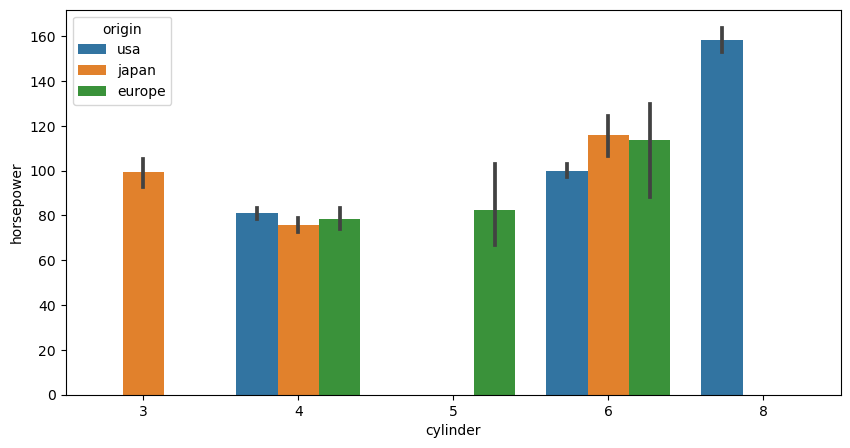

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x="cylinders",y="horsepower",data=df,hue="origin")

#plt.title("Distribution of origin")
plt.xlabel("cylinder",fontsize=10)
plt.show()

In [ ]:
# lineplot

<Axes: xlabel='model_year', ylabel='mpg'>

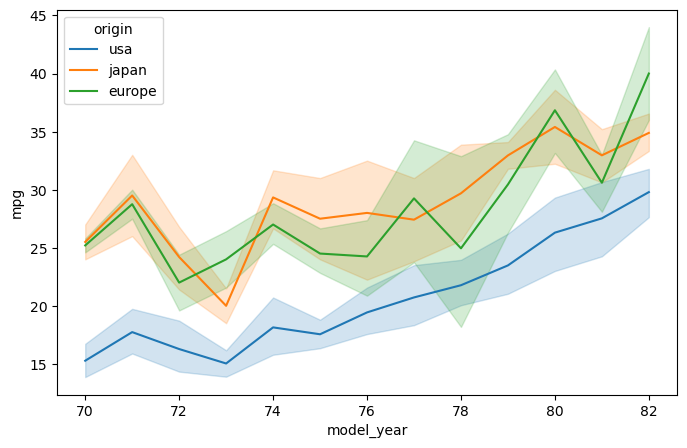

In [39]:
plt.figure(figsize=(8,5))
sns.lineplot(x="model_year",y="mpg",hue="origin",data=df,)

<Axes: xlabel='model_year', ylabel='displacement'>

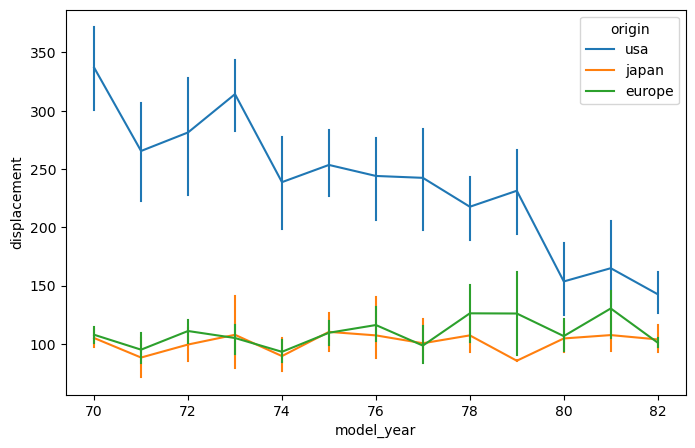

In [40]:
plt.figure(figsize=(8,5))
sns.lineplot(x="model_year",y="displacement",hue="origin",data=df,err_style="bars")

<Axes: xlabel='model_year', ylabel='horsepower'>

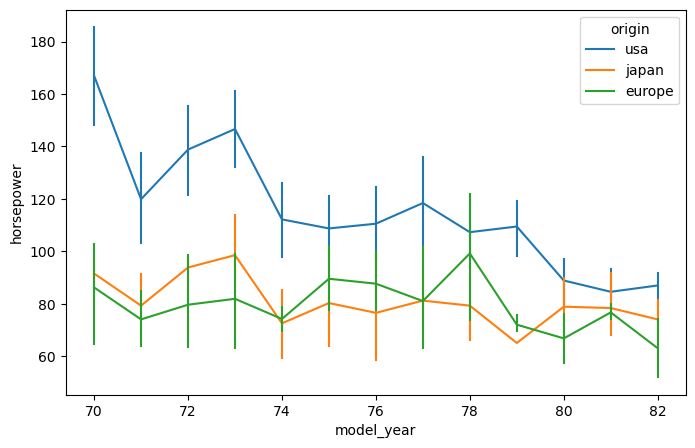

In [41]:
plt.figure(figsize=(8,5))
sns.lineplot(x="model_year",y="horsepower",hue="origin",data=df,err_style="bars")

In [ ]:
# histogram--- only numerical data we can represent
#we can see the pattern-- bell curve-- gaussian distribution...

<Axes: xlabel='mpg', ylabel='Count'>

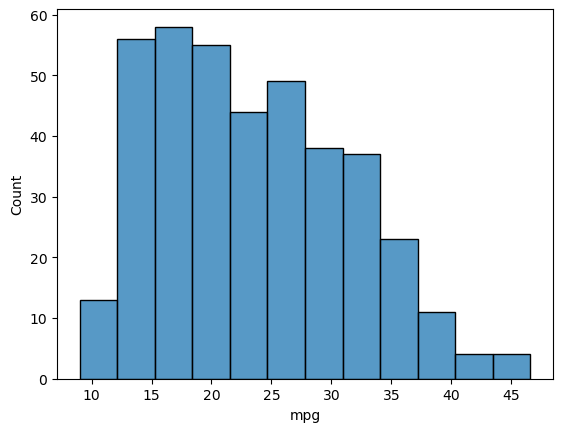

In [44]:
sns.histplot(x="mpg",data=df)

<Axes: xlabel='acceleration', ylabel='Count'>

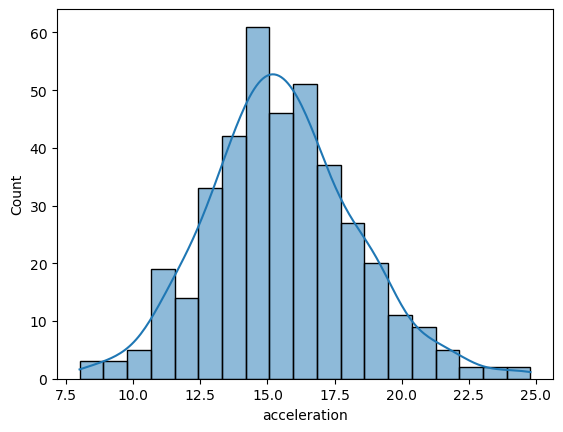

In [46]:
sns.histplot(x="acceleration",data=df,kde=True)

<Axes: xlabel='acceleration', ylabel='Count'>

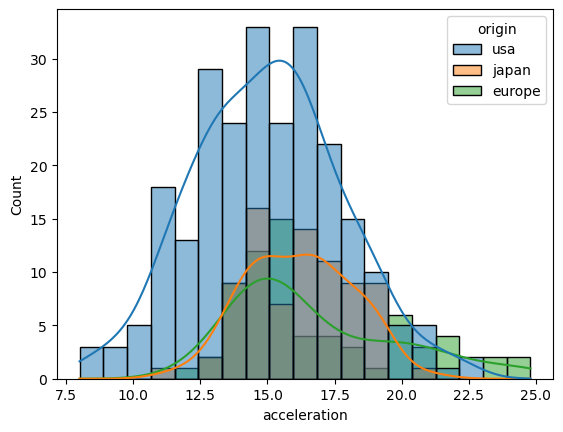

In [47]:
sns.histplot(x="acceleration",data=df,kde=True,hue="origin")

<Axes: xlabel='acceleration', ylabel='Count'>

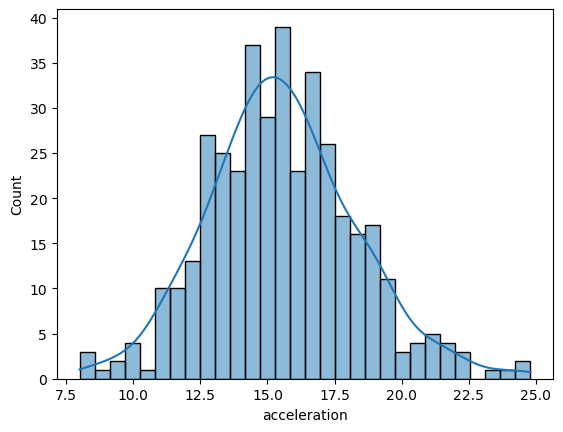

In [48]:
sns.histplot(x="acceleration",data=df,kde=True,bins=30)

<Axes: xlabel='acceleration', ylabel='Probability'>

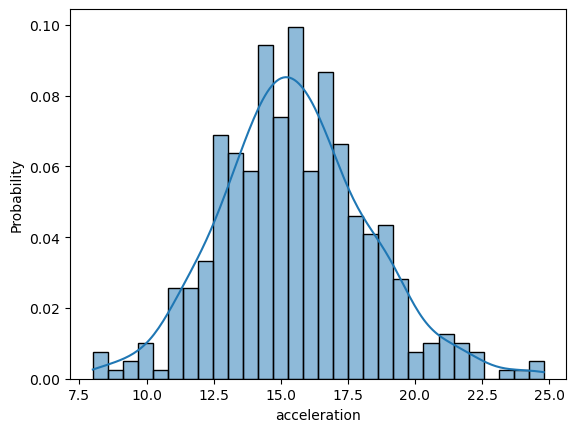

In [50]:
sns.histplot(x="acceleration",data=df,kde=True,bins=30,stat="probability")

In [ ]:
# boxplot

<Axes: xlabel='mpg'>

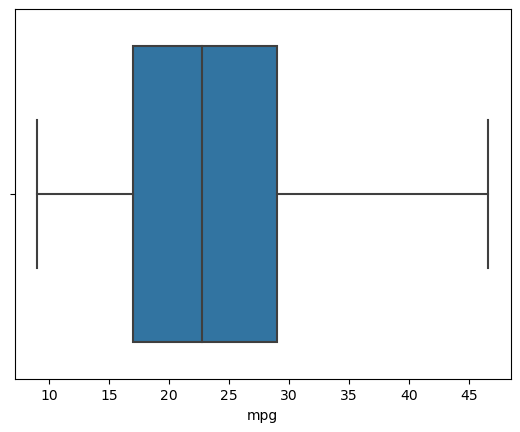

In [51]:
sns.boxplot(x=df["mpg"])

<Axes: ylabel='displacement'>

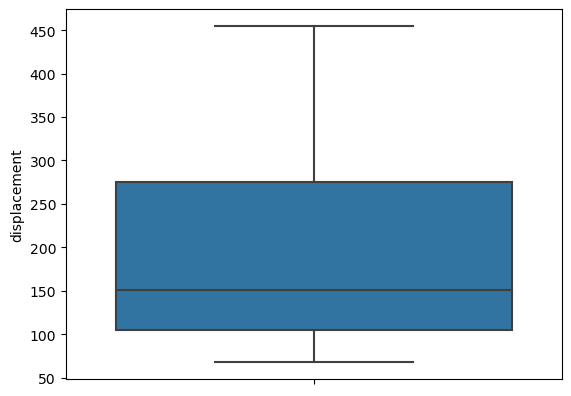

In [52]:
sns.boxplot(y=df["displacement"])

<Axes: ylabel='horsepower'>

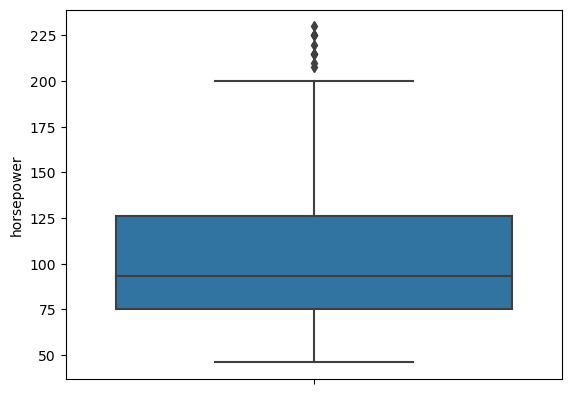

In [53]:
sns.boxplot(y=df["horsepower"])

In [ ]:
# pairplot

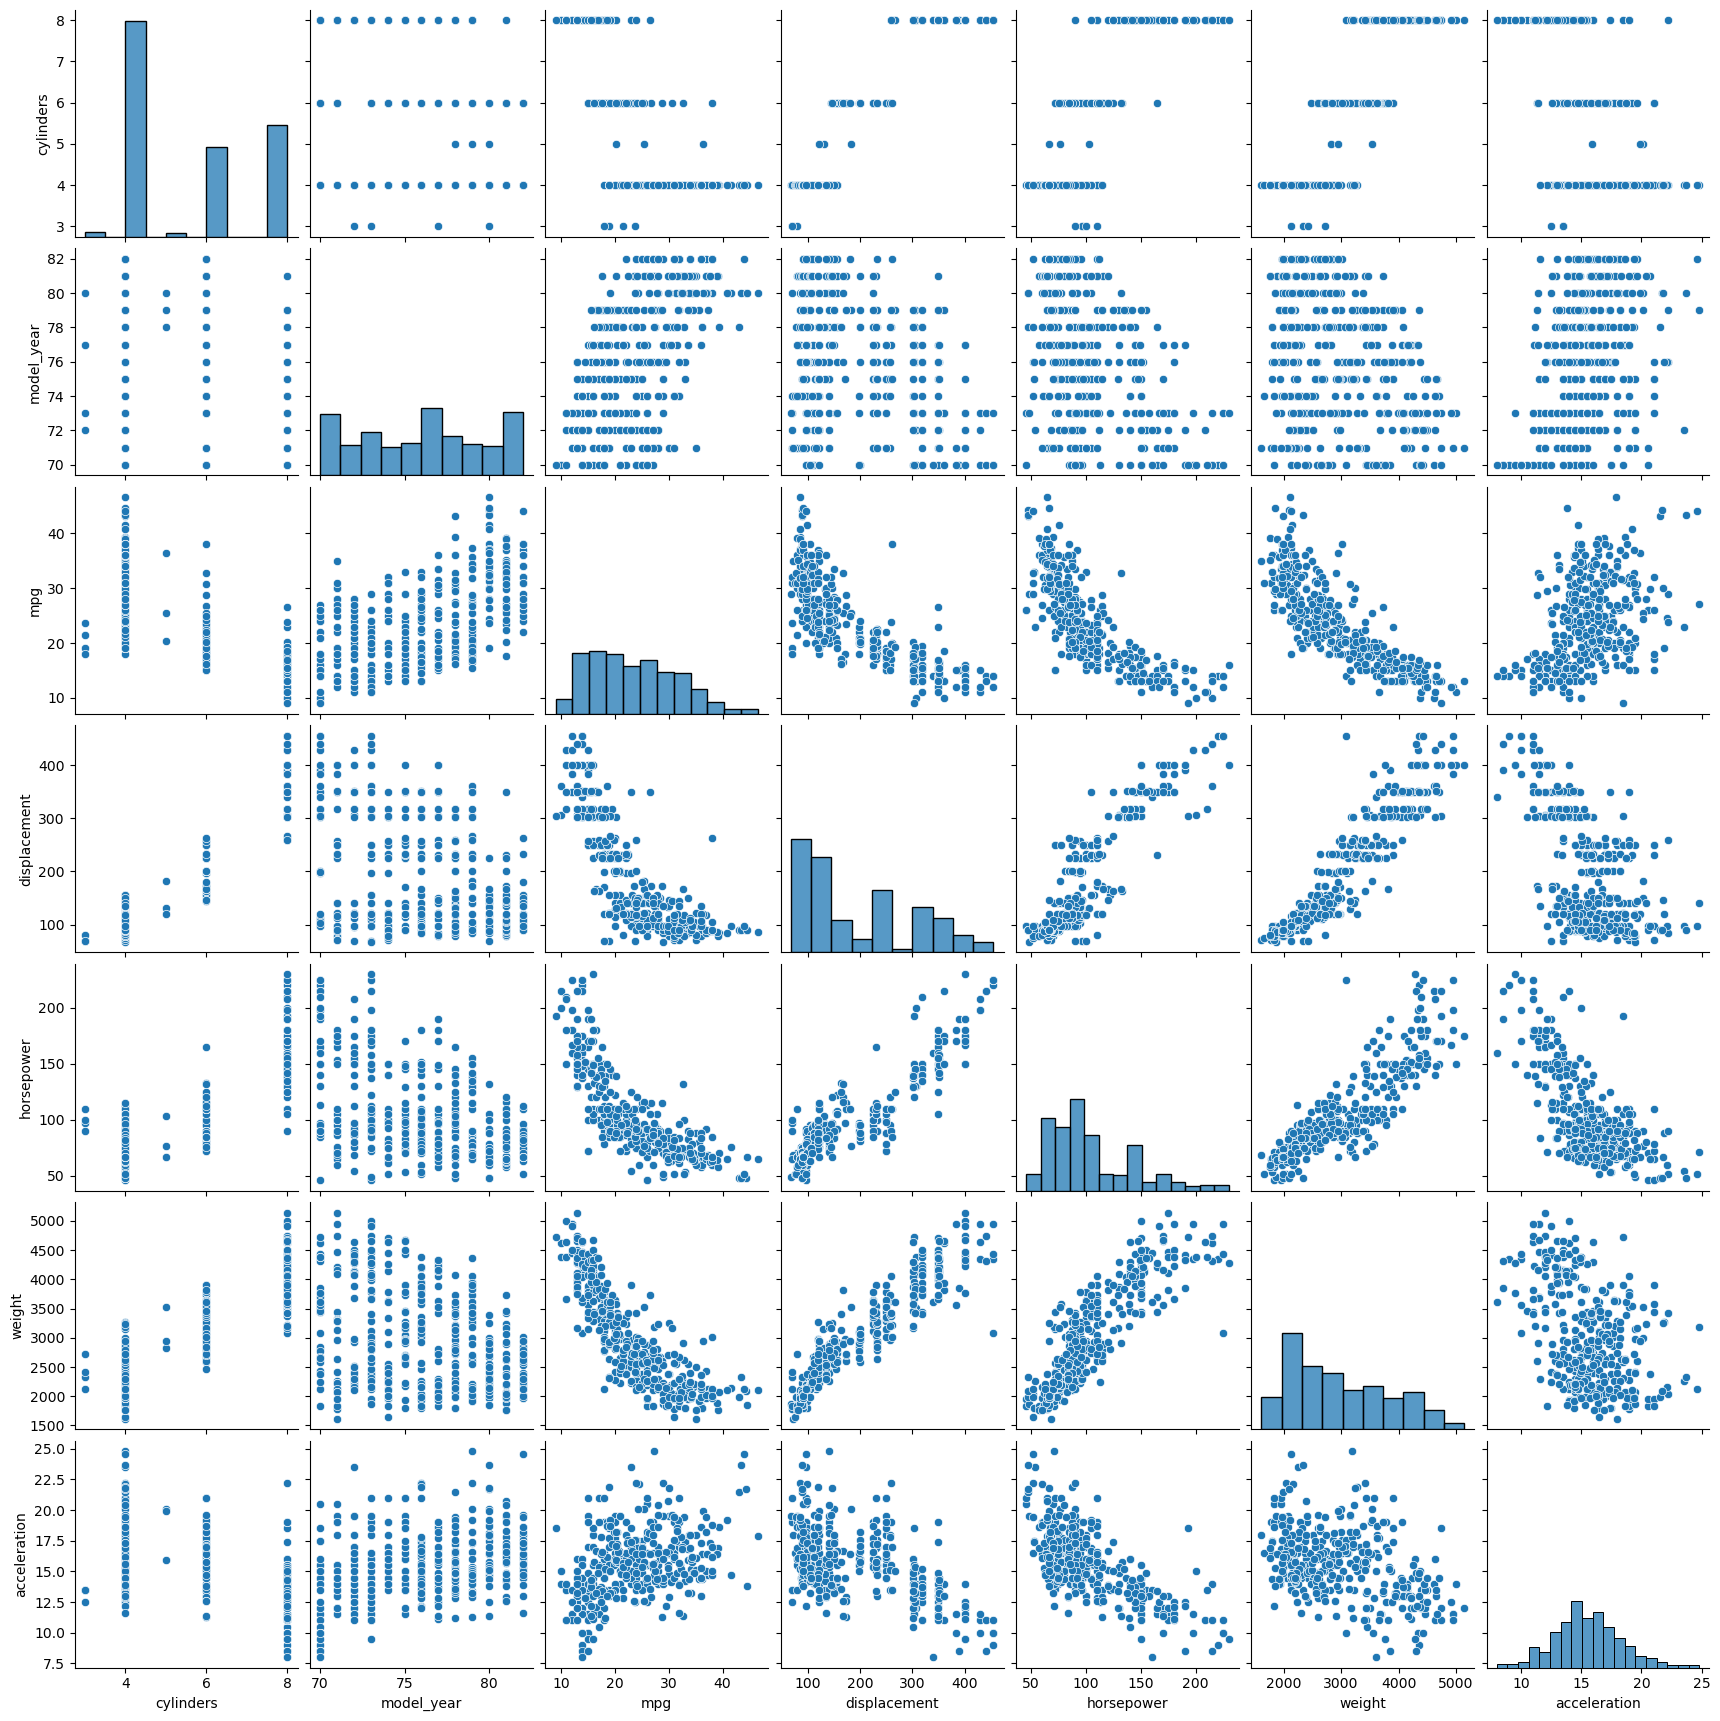

In [54]:
sns.pairplot(data=df)

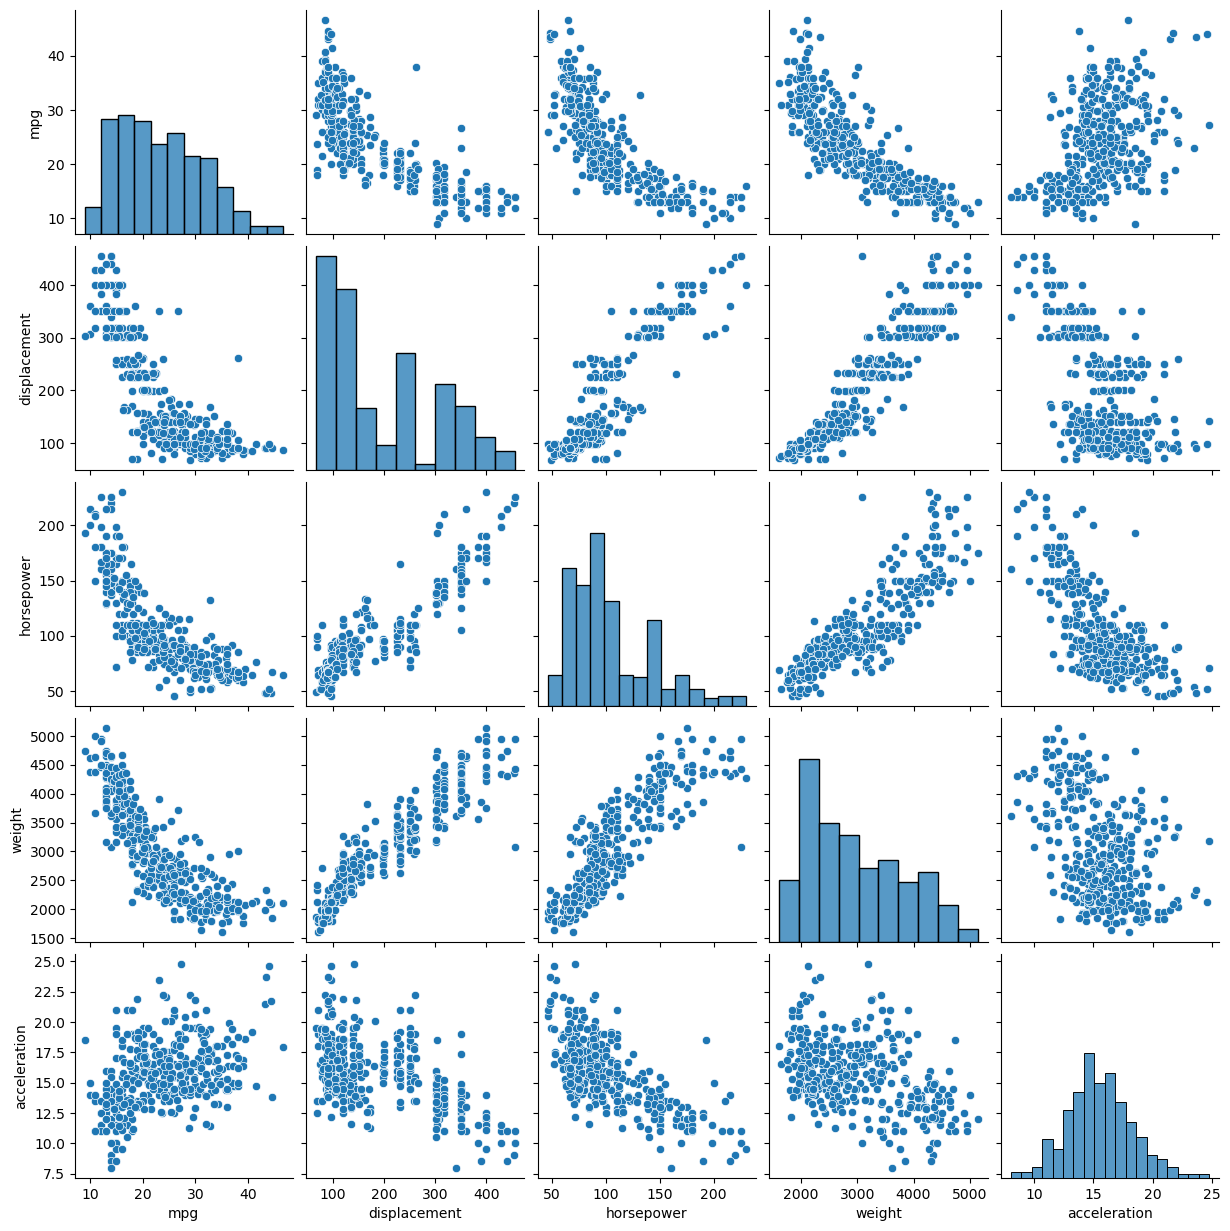

In [55]:
df1=df[["mpg","displacement","horsepower","weight","acceleration"]]
sns.pairplot(data=df1)